In [1]:
from bertopic import BERTopic
from bs4 import BeautifulSoup
import pandas as pd

# with reference to https://github.com/kapadias/medium-articles/blob/master/natural-language-processing/topic-modeling/Introduction%20to%20Topic%20Modeling.ipynb

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('6n_cleaned.csv', error_bad_lines=False)

df.head()

,DOI,Title,Abstract
0,10.47363/jaicc/2024(3)347,Impact of AI and GenAI on Healthcare: Security...,<jats:p>This paper aims to understand the impa...
1,10.70715/jitcai.2024.v1.i1.004,The Impact of GenAI on Student Engagement and ...,<jats:p>The rapid adoption of AI (AI) in highe...
2,10.7256/2454-0625.2024.6.70926,Socio-cultural risks of multimodal large gener...,<jats:p>\n The article is devoted to the study...
3,10.51191/issn.2637-1898.2024.7.12.12,AI: Duality in Applications of GenAI and Assis...,<jats:p>This paper explores the multifaceted r...
4,10.1007/s43681-022-00176-2,Review of the state of the art in autonomous AI,<jats:title>Abstract</jats:title><jats:p>This ...


In [3]:
# Define the cleaning function
def clean_html_xml(text):
    # Create a BeautifulSoup object to parse the HTML/XML
    soup = BeautifulSoup(text, 'html.parser')
    # Extract and return text without HTML/XML tags
    return soup.get_text()

In [4]:
df['cleaned_text'] = df['Abstract'].apply(clean_html_xml)

In [5]:
# Remove the columns
df = df.drop(columns=['DOI', 'Title', 'Abstract'], axis=1)

df.head()

,cleaned_text
0,This paper aims to understand the impact of AI...
1,The rapid adoption of AI (AI) in higher educat...
2,\n The article is devoted to the study of the ...
3,This paper explores the multifaceted role of A...
4,AbstractThis article presents a new design for...


In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['ai', 'ethics', 'research', 'genai', 'ethical', 'data', 'human', 'paper', 'study', 'potential', 'systems'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.cleaned_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['aims', 'understand', 'impact', 'healthcare', 'sector', 'grows', 'becomes', 'integral', 'part', 'healthcare', 'system', 'components', 'diagnosis', 'process', 'development', 'personalized', 'treatments', 'improvement', 'overall', 'patient', 'care', 'however', 'enhancements', 'raise', 'severe', 'concerns', 'regarding', 'security', 'privacy', 'patients']


[nltk_data] Downloading package stopwords to /Users/siri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


In [8]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"tools" + 0.004*"learning" + 0.004*"use" + 0.003*"applications" + '
  '0.003*"future" + 0.003*"art" + 0.003*"issues" + 0.003*"students" + '
  '0.003*"concerns" + 0.003*"impact"'),
 (1,
  '0.005*"learning" + 0.004*"challenges" + 0.004*"development" + '
  '0.003*"approach" + 0.003*"technologies" + 0.003*"based" + 0.003*"new" + '
  '0.003*"education" + 0.003*"also" + 0.003*"within"'),
 (2,
  '0.008*"technologies" + 0.007*"moral" + 0.005*"use" + 0.004*"model" + '
  '0.004*"also" + 0.004*"healthcare" + 0.004*"development" + 0.004*"impact" + '
  '0.004*"issues" + 0.003*"content"'),
 (3,
  '0.004*"development" + 0.004*"learning" + 0.004*"use" + 0.004*"technology" + '
  '0.004*"issues" + 0.003*"using" + 0.003*"concerns" + 0.003*"challenges" + '
  '0.003*"healthcare" + 0.003*"technologies"'),
 (4,
  '0.009*"use" + 0.007*"learning" + 0.006*"technology" + 0.005*"students" + '
  '0.005*"new" + 0.005*"education" + 0.005*"tools" + 0.005*"art" + '
  '0.004*"development" + 0.004*"future"


Number of documents per topic:
Topic 0 (tools, learning, use): 37 documents
Topic 1 (learning, challenges, development): 39 documents
Topic 2 (technologies, moral, use): 43 documents
Topic 3 (development, learning, use): 25 documents
Topic 4 (use, learning, technology): 105 documents
Topic 5 (technology, students, model): 49 documents
Topic 6 (use, based, using): 34 documents
Topic 7 (model, development, social): 34 documents
Topic 8 (learning, issues, development): 37 documents
Topic 9 (learning, healthcare, technology): 31 documents


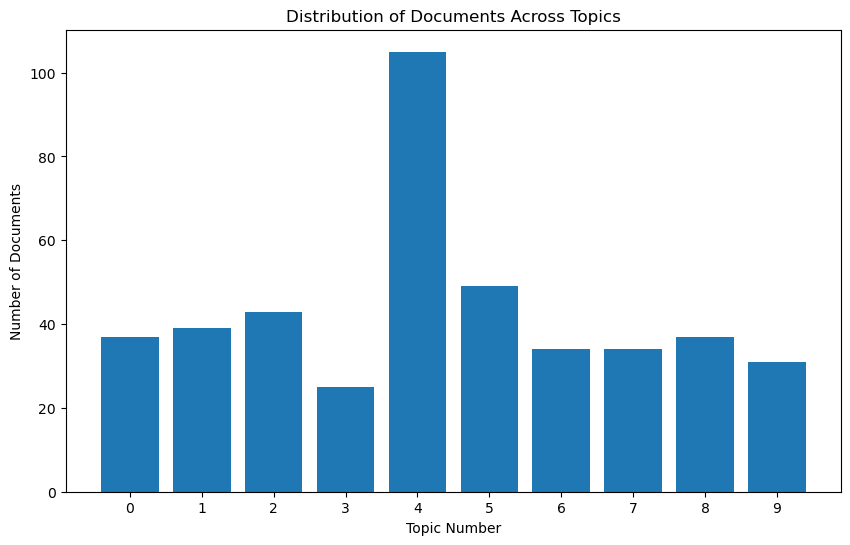

In [9]:
# Get the dominant topic for each document
dominant_topics = []
for doc in doc_lda:
    # Sort topics by probability for this document
    sorted_topics = sorted(doc, key=lambda x: x[1], reverse=True)
    # Get the dominant topic (topic with highest probability)
    dominant_topic = sorted_topics[0][0]
    dominant_topics.append(dominant_topic)

# Count documents per topic
from collections import Counter
topic_counts = Counter(dominant_topics)

# Create a sorted dictionary of topic counts
topic_distribution = {topic: topic_counts[topic] for topic in range(num_topics)}

# Print results
print("\nNumber of documents per topic:")
for topic, count in topic_distribution.items():
    # Get the top words for this topic
    top_words = lda_model.show_topic(topic, topn=3)
    words = ", ".join([word for word, prob in top_words])
    print(f"Topic {topic} ({words}): {count} documents")

# Optional: Create a visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_distribution.keys(), topic_distribution.values())
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents Across Topics')
plt.xticks(range(num_topics))
plt.show()